In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [4]:
data_path = '../data/'
file_rice = 'rice.png'
file_woman = 'woman.png'

In [5]:
def print_images(list_of_images, size = 20):
    fig, ax = plt.subplots(1, len(list_of_images), figsize=(size,size))
    for i, (img,name) in enumerate(list_of_images):
        ax[i].set_title(str(name))
        ax[i].imshow(img, cmap='Greys_r');
        
def sharpen_img(image, blur):
    return image + (image - blur)

# Q.2 Edge Detection

In [68]:
def plot_edges(img, threshold, title_to_add = ""):
    # Using cv2.CV_64F datatype 
    sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    sobel = cv2.magnitude(sobel_x, sobel_y)

    max_val_sobel = np.amax(sobel)
    to_print = []
    for thr in threshold:
        thr_val = thr
        if thr < 1: # means percentage
            thr_val = int(max_val_sobel * thr)

        # Apply threshold and save it ready to print
        to_print.append((cv2.threshold(sobel, thr_val, max_val_sobel, cv2.THRESH_BINARY)[1],
                         "Sobel Edge Detector\n %swith Threshold of %s" % (title_to_add, thr)))

    # Plot supperposed filters
    print_images(to_print, 12)

## Q.2.1 Sobel edge detector

### Part 1

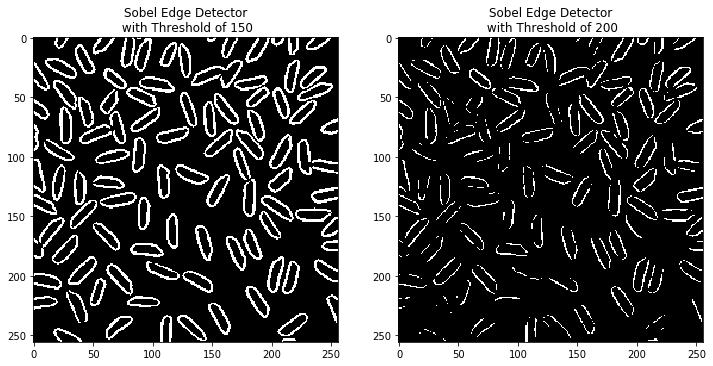

In [69]:
img_rice = cv2.imread(data_path + file_rice, cv2.IMREAD_GRAYSCALE)
plot_edges(img_rice, [150, 200])

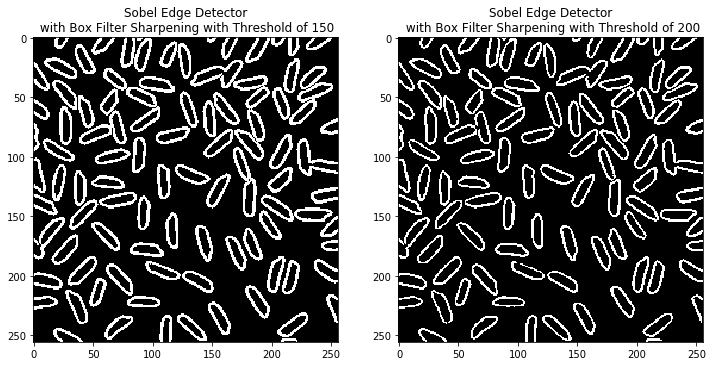

In [70]:
# Getting blurred images
img_rice_filter_box = cv2.blur(img_rice, (5,5))

# Getting sharp images
img_rice_sharp_box = sharpen_img(img_rice, img_rice_filter_box)

# Calculate and plot
plot_edges(img_rice_sharp_box, [150, 200], "with Box Filter Sharpening ")

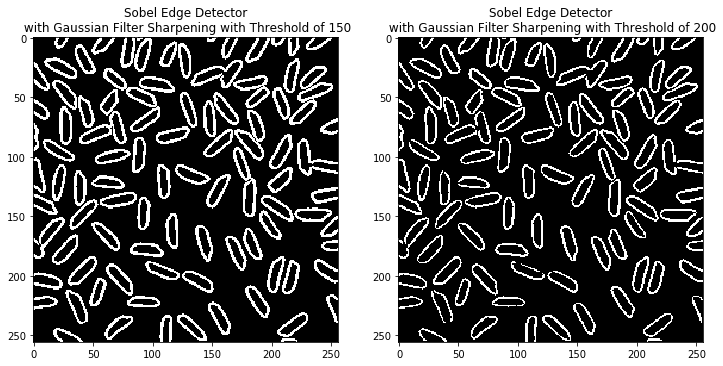

In [71]:
# Getting blurred images
img_rice_filter_gaussian = cv2.GaussianBlur(img_rice, ksize = (5,5), sigmaX = np.sqrt(2))

# Getting sharp images
img_rice_sharp_gaussian = sharpen_img(img_rice, img_rice_filter_gaussian)

# Calculate and plot
plot_edges(img_rice_sharp_gaussian, [150, 200], "with Gaussian Filter Sharpening ")

1. Applying sharpening filters before applying the Sobel filters all the detection of the begening and the end all edges. For instance, we can observe that the rice grain has 2 layers.
2. The threshold of 150 works much better than 200 and we can observe a well defined contour with the images no matter the sharpening filter applied.

### Part 2

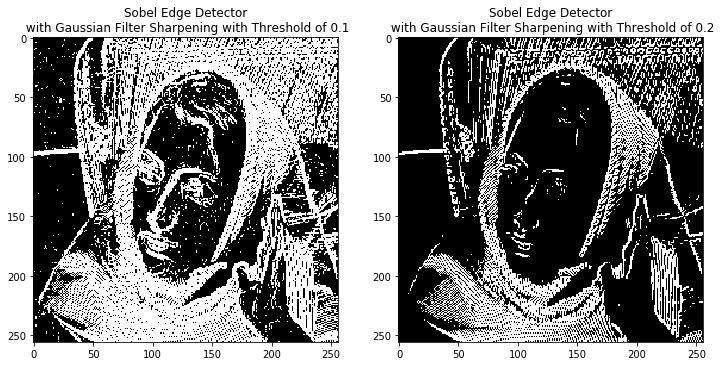

In [72]:
# Getting image
img_woman = cv2.imread(data_path + file_woman, cv2.COLOR_BGR2GRAY)

# Calculate and plot
plot_edges(img_woman, [0.1, 0.2], "with Gaussian Filter Sharpening ")

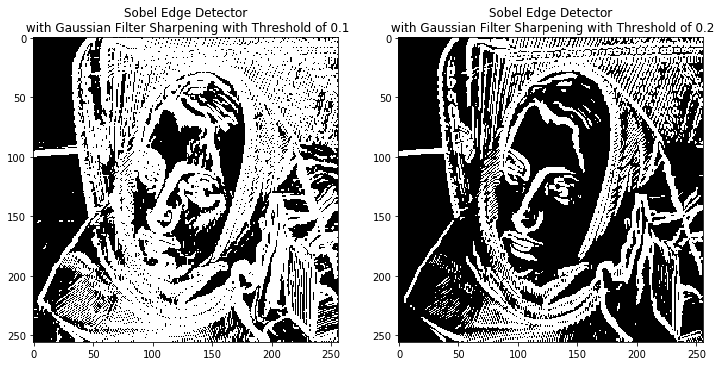

In [73]:
# Getting blurred images
img_woman_filter_box = cv2.blur(img_woman, (3,3))

# 
plot_edges(img_woman_filter_box, [0.1, 0.2], "with Gaussian Filter Sharpening ")

Denoising the image before applying the sobel filter makes a huge difference and results in a much better edge detection. The threshold of 20% is better than 10%.

## Q.2.2 Laplacian of Gaussian

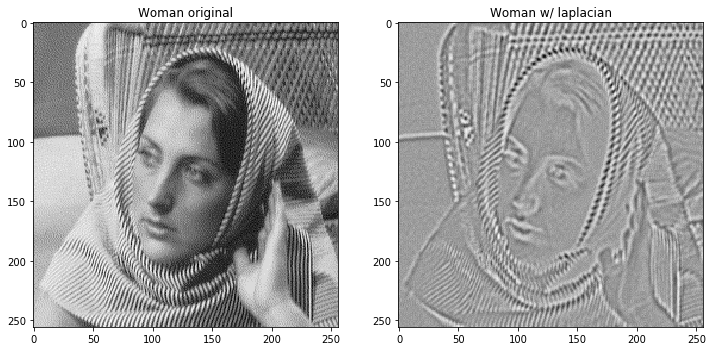

In [74]:
img_woman_filter_gaussian = cv2.GaussianBlur(img_woman, ksize = (5,5), sigmaX = np.sqrt(2))

laplacian_woman = cv2.Laplacian(img_woman_filter_gaussian, cv2.CV_64F)

# Ploting images
print_images([(img_woman, 'Woman original'),
              (laplacian_woman, 'Woman w/ laplacian')], 12)